# Download Raw Files of the Google Ngram Data
#### Alex John Quijano

### 1. Introduction.
The google ngram is a freely accessible database that represents years of human discourse in multiple languages by counting/scanning ngrams (word sequences) in the Google books corpus. With the <a href="https://books.google.com/ngrams">Google Ngram viewer</a>, you can easily track the 1gram occurences of words from 1800-2008 in eight unique languages. These datasets where generated in 2012 (version 2) <span style="color:blue">[Lin et.al. 2012]</span> and in 2009 (version 1). Large portions of the dataset can be downloaded directly from this link, <a href="http://storage.googleapis.com/books/ngrams/books/datasetsv2.html">Google Ngram Datasets V2</a>.

**GITHUB.** <a href="https://github.com/stressosaurus/raw-data-google-ngram">raw-data-google-ngram</a>

**Purpose.** The python scripts on this repository provides an easy way to download, filter, and normalize these large datasets iteratively for researchers interested in data science, mathematical modeling, computational linguistics, historical linguistics, and/or content analysis. This kind of dataset have been used to study culture and cultural trends - also known as culturomics <span style="color:blue">[Michel 2010]</span>. Although this data set is impressive, it is not immune to sampling bias. Researchers have shown that the word trend frequencies taken from the google books corpus are dominated by scientific literature <span style="color:blue">[Pechenick 2015]</span>.

The provided script named **downloadAndFilter.ngram.sh** allows you to easily download and filter the entire dataset of a chosen language with specific parameters. The python script **normalize.ngram.py** takes in the filtered data and it organizes the data such that the year occurences of each unique ngram is represented as a matrix where each row represents the ngram and column represents years. The **downloadAndFilter.ngram.sh** and **normalize.ngram.py** creates three directories. Each corresponds to raw, filtered, and normalized data but the raw directory only contains the file information that was downloaded and filtered  because these scripts immediately deletes these large files when the normalization is complete.

**Limitations.** The **downloadAndFilter.ngram.sh** downloads ngrams that start with any alphabet a-z. The numerals 0-9 and punctuations are excluded but you can include this by editing (uncomment) line 23 of the script.

### 2. Download and Process Raw Data.

Below uses **bash scripting** to download and process the Google Ngram data of the Simplified-Chinese (chi-sim) language as a demonstration. See Section 3 for language codes.

#### 2.1. Downloading and Filtering Raw data (with specified parameters).

In [1]:
%%bash

# parameters
n=1 # ngram
l=chi-sim # language (see section 3 for language codes)
yearLowerBound=1900 # start year
yearUpperBound=2008 # end year
wordCountLowerBound=1 # number of word counts to filter
bookCountLowerBound=1 # number of book counts to filter

# download
./downloadAndFilter.ngram.sh $n $l $yearLowerBound $yearUpperBound $wordCountLowerBound $bookCountLowerBound

googlebooks-chi-sim-all-1gram-20120701-a
googlebooks-chi-sim-all-1gram-20120701-a.filtered
googlebooks-chi-sim-all-1gram-20120701-b
googlebooks-chi-sim-all-1gram-20120701-b.filtered
googlebooks-chi-sim-all-1gram-20120701-c
googlebooks-chi-sim-all-1gram-20120701-c.filtered
googlebooks-chi-sim-all-1gram-20120701-d
googlebooks-chi-sim-all-1gram-20120701-d.filtered
googlebooks-chi-sim-all-1gram-20120701-e
googlebooks-chi-sim-all-1gram-20120701-e.filtered
googlebooks-chi-sim-all-1gram-20120701-f
googlebooks-chi-sim-all-1gram-20120701-f.filtered
googlebooks-chi-sim-all-1gram-20120701-g
googlebooks-chi-sim-all-1gram-20120701-g.filtered
googlebooks-chi-sim-all-1gram-20120701-h
googlebooks-chi-sim-all-1gram-20120701-h.filtered
googlebooks-chi-sim-all-1gram-20120701-i
googlebooks-chi-sim-all-1gram-20120701-i.filtered
googlebooks-chi-sim-all-1gram-20120701-j
googlebooks-chi-sim-all-1gram-20120701-j.filtered
googlebooks-chi-sim-all-1gram-20120701-k
googlebooks-chi-sim-all-1gram-20120701-k.filtered

#### 2.2. Normalizing the Filtered Data (with specified parameters).

In [2]:
%%bash

# parameters
n=1 # ngram
l=chi-sim # language
ignore_case=True # Converts the ngrams into lowercase and consolidates the raw counts of any two identical ngram.
restriction=True # Removes ngrams with a zero raw counts on any year.
annotation=False #  Removes the part-of-speech annotation (the '\_NOUN' part of the ngram string) of an ngram and consolidates the raw counts of any two identical ngram.

# normalize
./normalize.ngram.py $n $l $ignore_case $restriction $annotation

normalization complete for googlebooks-chi-sim-all-1gram-20120701.filtered.ITrueRTrueAFalse.all.pkl


We follow the normalization process from previous work of Sindi and Dale 2016 <span style="color:blue">[Sindi and Dale 2016]</span>. Given a set of words $V = \{w_1, w_2, \cdots, w_c\}$ and years $Y = \{t_0, t_1, t_2, \cdots, t_{T-1} \}$, the frequency of a word $w_i$ in a corpus at time $t$, $freq(r_{i,t}) = x_{i,t}$ is the number of occurrences of that word in that corpus. As such, the total number of words, $c$, is fixed as is the number of years $T$ and we thus represent the word frequencies as a matrix: $\mathbf{R} \in \mathbb{R}^{c \times T}$ where

$$\mathbf{R}_{i,t} = freq(r_{i,t}) = x_{i,t}, \hspace{15px} x_{i,t} \ge 1$$

In our normalization process, we first convert the frequency matrix $\mathbf{R}$ into a proportion matrix $\mathbf{P}$ by normalizing the columns of $\mathbf{R}$ which normalizes word frequencies by year:

$$\mathbf{P}_{i,t} = p_{i,t}, \hspace{15px} p_{i,t} = \frac{x_{i,t}}{\sum_{i=1}^{c} x_{i,t}}.$$

Finally, we normalize the proportions for each unigram by converting the rows of $\mathbf{P}$ into z-scores:

$$\mathbf{Z}_{i,t} = z_{i,t}, \hspace{15px} z_{i,t} = \frac{p_{i,t} - \overline{p_{i}}}{\sigma_{p_{i}}}$$

where $\overline{p_{i}}$ is the mean and $(\sigma_{p_{i}})^2$ is the variance of the $i$th row of $\mathbf{P}$;

$$\overline{p_{i}} = \frac{1}{T} \sum_{t=0}^{T-1} p_{i,t}$$

and

$$(\sigma_{p_{i}})^2 = \frac{1}{T-1} \sum_{t=0}^{T-1} (p_i - \overline{p_{i}})^2.$$

The matrix $\mathbf{P}$ has the following properties.

1. $\sum_{i=1}^c p_{i,t} = 1$
2. $\sum_{i=1}^c \overline{p_{i}} = 1$
3. $\sum_{i=1}^c \sum_{j=1}^c \overline{p_{i}}\overline{p_{j}} = 1$
4. $\sum_{i=1}^c \sum_{t=0}^{T-1} p_{i,t} = \sum_{t=0}^{T-1} \sum_{i=1}^c p_{i,t} = T$
5. $\sum_{t=0}^{T-1} \frac{1}{c} \sum_{i=1}^{c} p_{i,t} = \frac{T}{c}$

The matrix $\mathbf{Z}$ has the following properties.

1. $\frac{1}{T} \sum_{t=0}^{T-1} z_{i,t} = 0$
2. $\frac{1}{T-1} \sum_{t=0}^{T-1} \left(z_{i,t} - 0 \right)^2 = 1$

#### 2.3. Downloading for $n > 1$.

Downloading ngrams for $n > 1$ requires large memory (i.e > 1 terabyte). To process ngrams with $n > 1$, set the optional parameter, **specific_fileName='1gram-list-special-chi-sim'**. This option will tell the machine to search for the file named '1gram-list-special-chi-sim' in the '1gram-list' directory that contains a list of 1grams. The resulting ngrams will contain these 1grams. For example 1gram '特' will result in 2grams '一 特' and '特 一', etc. Setting this paramter to **specific_fileName='all'** while $n > 1$ will process all ngrams.

You can create your own list of 1grams and save it in the '1gram-list' directory. You can also try the included stop words lists (ex. '1gram-list-stop-word-chi-sim').

### 3. Loading the Processed Data using the googleNgram Python module.

```
import googleNgram as gn
n = '1'
l = 'chi-sim'
D = gn.read(n,l,ignore_case=True,restriction=True,annotation=False)
```

**Inputs of gn.read.**

1. 'n': (string) The n of ngram must be a string (ex. n='1', 1grams only for preprocessed data).
2. 'l': (string) The available languages for the preprocessed data are the following.
    * 'eng'         (English)
    * 'eng-us'      (American English)
    * 'eng-gb'      (British English)
    * 'eng-fiction' (English Fiction)
    * 'chi-sim'     (Simplified Chinese)
    * 'fre'         (French)
    * 'ger'         (German)
    * 'heb'         (Hebrew)
    * 'ita'         (Italian)
    * 'rus'         (Russian)
    * 'spa'         (Spanish)
3. 'ignore_case': (boolean optional, default = True) The ngrams are in lowercase and the raw counts of any two identical ngram are consolidated.
4. 'restriction': (boolean optional, default = True) Ngrams with a zero raw counts on any year are excluded.
5. 'annotation': (boolean optional, default = False) The part-of-speech annotation (the '\_NOUN' part of the ngram string) of an ngram is removed and the raw counts of any two identical ngram are consolidated.
6. 'specific_fileName': (string optional,  default = 'all' for $n = 1$ only) The filename of a list of 1grams to normalize if $n > 1$. (see Section 2.3)

The parameters **ignore_case**, **restriction**, and **annotation** must match the normalized parameters from <a href="#section-2">Section 2</a>.
    
**Outputs of gn.read.**

The output is a dictionary data structure with 'rscore', 'kscore', 'pscore', 'zscore', and 'pos' as keys. Each key contained DataFrames where rows are the ngrams and the columns are the years.

1. 'rscore': The raw counts.
3. 'pscore': The probability scores.
4. 'zscore': The z-scores
5. 'pos': The part-of-speech annotations vector associated of a given ngram if annotations are consolidated for each ngram. Consolidation of part-of-speech is when a word with multiple annotations are summed up. For example, the raw data ngram strings *one_NUM* and *one_NOUN* will result in *one* in the vocabulary and [' NUM NOUN'] in the part-of-speech vector. That means the 1gram *one* is annotated as a number NUM and/or as a noun NOUN.

**The part-of-speech annotations.**

The version 2 of the google ngram raw data includes part-of-speech annotations on each ngram. Refer to the table below for a full list of annotations.

| part-of-speech               | annotation |
|------------------------------|------------|
| Noun                         | NOUN       |
| Verb                         | VERB       |
| Adjective                    | ADJ        |
| Adverb                       | ADV        |
| pronoun                      | PRON       |
| determiner and article       | DET        |
| preposition and postposition | ADP        |
| numeral                      | NUM        |
| conjunction                  | CONJ       |
| particle                     | PRT        |
| other                        | O          |
| none                         |            |

#### 3.1. Loading and Visualizing the Dataset Examples.

The python scripts below loads the pre-processed datasets and produces basic time-series plots for a given list of 1gram strings.

**Note.** The english vocabulary is only limited to some words. Words that are somehow did not exist in the raw data and/or filtered out during data processing and normalization may not appear in the vocabulary variable. The script below may give you errors if a given ngram string does not exist in the vocabulary.

In [1]:
import matplotlib.font_manager as mfm
import matplotlib.pyplot as plt
import googleNgram as gn
import pandas as pd
import numpy as np
fontP = mfm.FontProperties(fname='unifont.ttf',size=12)

##### 3.1.1. Dataset with Consolidated Annotations.

In [2]:
# LOAD DATASET: English with consolidated annotations
n = '1'
l = 'chi-sim'
D = gn.read(n,l,ignore_case=True,restriction=True,annotation=False)
year = D['rscore'].columns
print('Language: '+l)
print('Vocabulary Words: '+str(D['rscore'].shape[0]))
print('Years: '+str(D['rscore'].shape[1]))
print('DataFrame keys: '+str(D.keys()))

Language: chi-sim
Vocabulary Words: 180
Years: 109
DataFrame keys: dict_keys(['rscore', 'pscore', 'zscore', 'pos'])


In [3]:
# EXAMPLE: List of four example 1grams
chosen_1grams = ['八','不得','部','本']

In [4]:
# PRINT: Part-of-speech annotation vectors
print('1gram, part-of-speech annotations')
print('---------------------------------')
for i in chosen_1grams:
    print(i+', '+str(D['pos'][i]))

1gram, part-of-speech annotations
---------------------------------
八, ['NOUN', '', 'NUM']
不得, ['VERB', '', 'ADV']
部, ['NOUN', 'NUM', '']
本, ['NOUN', 'NUM', 'DET', '']


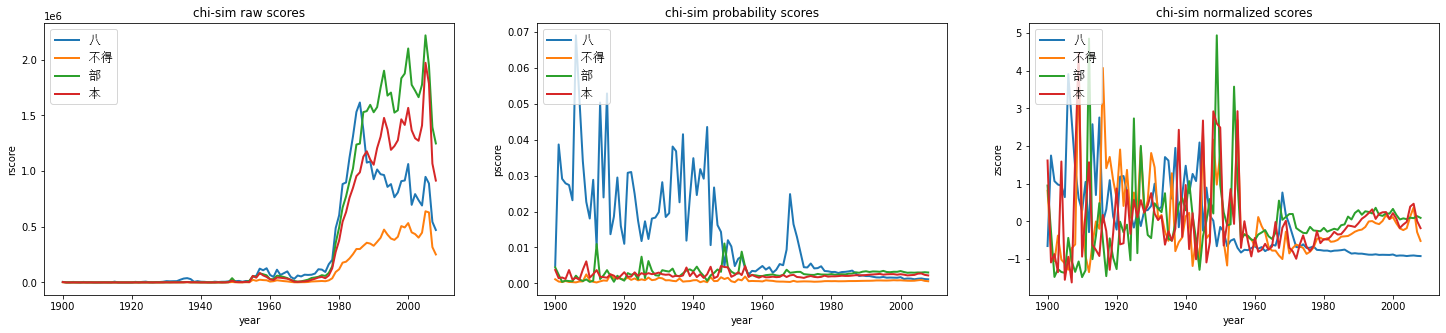

In [5]:
# PLOT: Time-series plots of four 1grams
fig, ax = plt.subplots(1,3,figsize=(25,5))

# rscore plot
for i, j in enumerate(chosen_1grams):
    ax[0].plot(year,D['rscore'].T[j],label=chosen_1grams[i],linewidth=2)
ax[0].set_xlabel('year')
ax[0].set_ylabel('rscore')
ax[0].set_title(l+' raw scores')
ax[0].legend(loc=2,prop=fontP)

# pscore plot
for i, j in enumerate(chosen_1grams):
    ax[1].plot(year,D['pscore'].T[j],label=chosen_1grams[i],linewidth=2)
ax[1].set_xlabel('year')
ax[1].set_ylabel('pscore')
ax[1].set_title(l+' probability scores')
ax[1].legend(loc=2,prop=fontP)

# zscore plot
for i, j in enumerate(chosen_1grams):
    ax[2].plot(year,D['zscore'].T[j],label=chosen_1grams[i],linewidth=2)
ax[2].set_xlabel('year')
ax[2].set_ylabel('zscore')
ax[2].set_title(l+' normalized scores')
ax[2].legend(loc=2,prop=fontP)
plt.show()

##### 3.1.2. Dataset with Annotations.

In [6]:
# LOAD DATASET: Simplified-Chinese with annotations
n = '1'
l = 'chi-sim'
Da = gn.read(n,l,ignore_case=True,restriction=True,annotation=True)
year = D['rscore'].columns
print('Language: '+l)
print('Vocabulary Words: '+str(D['rscore'].shape[0]))
print('Years: '+str(D['rscore'].shape[1]))
print('DataFrame keys: '+str(D.keys()))

Language: chi-sim
Vocabulary Words: 180
Years: 109
DataFrame keys: dict_keys(['rscore', 'pscore', 'zscore', 'pos'])


In [7]:
# EXAMPLE: List of four example 1grams
chosen_1grams_a = ['八_NOUN','八_NUM','不得_VERB','不得_ADV']

In [8]:
# PRINT: Part-of-speech annotation vectors
print('1gram, part-of-speech annotations')
print('---------------------------------')
for i in chosen_1grams_a:
    print(i+', '+str(Da['pos'][i]))

1gram, part-of-speech annotations
---------------------------------
八_NOUN, NOUN
八_NUM, NUM
不得_VERB, VERB
不得_ADV, ADV


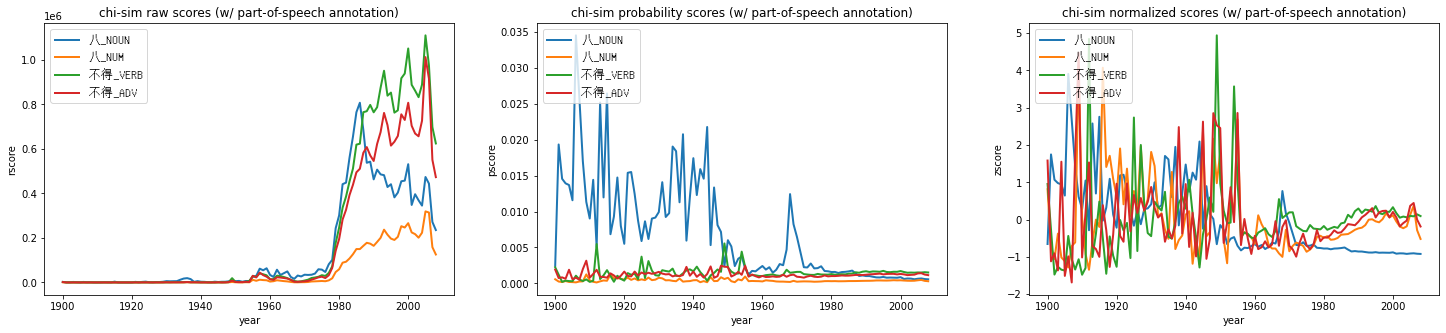

In [9]:
# PLOT: Time-series plots of four 1grams
fig, ax = plt.subplots(1,3,figsize=(25,5))

# rscore plot
for i, j in enumerate(chosen_1grams):
    ax[0].plot(year,Da['rscore'].T[j],label=chosen_1grams_a[i],linewidth=2)
ax[0].set_xlabel('year')
ax[0].set_ylabel('rscore')
ax[0].set_title(l+' raw scores (w/ part-of-speech annotation)')
ax[0].legend(loc=2,prop=fontP)

# pscore plot
for i, j in enumerate(chosen_1grams):
    ax[1].plot(year,Da['pscore'].T[j],label=chosen_1grams_a[i],linewidth=2)
ax[1].set_xlabel('year')
ax[1].set_ylabel('pscore')
ax[1].set_title(l+' probability scores (w/ part-of-speech annotation)')
ax[1].legend(loc=2,prop=fontP)

# zscore plot
for i, j in enumerate(chosen_1grams):
    ax[2].plot(year,Da['zscore'].T[j],label=chosen_1grams_a[i],linewidth=2)
ax[2].set_xlabel('year')
ax[2].set_ylabel('zscore')
ax[2].set_title(l+' normalized scores (w/ part-of-speech annotation)')
ax[2].legend(loc=2,prop=fontP)
plt.show()

#### 3.2. Subsetting the Data According to a word list from a File.

Suppose you want to only choose specific rows in the dataframe. You can do this by having a list of words - stopwords for example - and use that list to choose the rows corresponding to those words. Below is an example on how to subset the dataframe using a list of words from a file.

In [10]:
n = '1'
l = 'chi-sim'
D = gn.read(n,l,ignore_case=True,restriction=True,annotation=False)
R = D['rscore']
with open('1gram-list/stopwords/'+l,encoding='utf8') as file:
    stopword_list = set(file.read().split('\n'))
R_subset = R.loc[stopword_list.intersection(R.index)]
R_subset.head(5) # prints only 5 rows

,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
个,6707.0,73.0,52.0,568.0,162.0,10.0,164.0,41.0,125.0,42.0,...,5563848.0,5574929.0,5274389.0,5471106.0,5245910.0,5638150.0,6992614.0,5919769.0,4249559.0,3863737.0
使,3053.0,58.0,63.0,390.0,44.0,4.0,34.0,34.0,46.0,16.0,...,2188522.0,2255829.0,2059094.0,2052291.0,1917389.0,1972694.0,2318012.0,1949005.0,1314665.0,1193675.0
所,7296.0,136.0,129.0,468.0,188.0,61.0,165.0,149.0,289.0,88.0,...,3288280.0,3579527.0,3210061.0,3407651.0,3322054.0,3652206.0,4475949.0,3954025.0,2584698.0,2385177.0
一,32338.0,5059.0,5974.0,9763.0,8273.0,3066.0,3105.0,2406.0,9211.0,1825.0,...,15372138.0,16176331.0,14510888.0,15361638.0,14394143.0,15335049.0,18472385.0,16428392.0,11553811.0,10763052.0
及,2996.0,62.0,49.0,173.0,145.0,43.0,507.0,63.0,95.0,74.0,...,2016035.0,2307563.0,2030683.0,2121696.0,2030797.0,2257675.0,2783649.0,2475682.0,1715111.0,1485641.0


# References

1. Sindi, Suzanne S., and Rick Dale. "Culturomics as a data playground for tests of selection: Mathematical approaches to detecting selection in word use." Journal of theoretical biology 405 (2016): 140-149.

2. Pechenick, Eitan Adam, Christopher M. Danforth, and Peter Sheridan Dodds. "Characterizing the Google Books corpus: Strong limits to inferences of socio-cultural and linguistic evolution." PloS one 10.10 (2015): e0137041.

3. Y. Lin, J.-B. Michel, E. L. Aiden, J. Orwant, W. Brockman, and S. Petrov, Syntactic annotations for the google books ngram corpus, in Proceedings of the ACL 2012 system demonstrations, Association for Computational Linguistics, 2012, pp. 169–174.

4. Michel, Jean-Baptiste, et al. "Quantitative analysis of culture using millions of digitized books." science (2010): 1199644.